<a href="https://colab.research.google.com/github/aaolcay/A_little_Statistics/blob/main/statistics_tells_a_bit_lies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
!ls

MyDrive


In [3]:
import os
os.chdir('/gdrive/MyDrive/Anscombe_s Quartet')

In [4]:
!ls

'archive (1).zip'   statistics_tells_a_bit_lies.ipynb


In [5]:
!unzip \*.zip && rm *.zip

Archive:  archive (1).zip
  inflating: Anscombe_quartet_data.csv  


In [6]:
import pandas as pd

In [7]:
!ls

Anscombe_quartet_data.csv  statistics_tells_a_bit_lies.ipynb


In [8]:
# Load dataset
anscombe = pd.read_csv('Anscombe_quartet_data.csv')

In [9]:
# Print out the first 10 data
anscombe.head(10)

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47
5,14.0,9.96,8.10,8.84,8.0,7.04
6,6.0,7.24,6.13,6.08,8.0,5.25
7,4.0,4.26,3.10,5.39,19.0,12.50
8,12.0,10.84,9.13,8.15,8.0,5.56
9,7.0,4.82,7.26,6.42,8.0,7.91


In [10]:
anscombe['x1'] = anscombe['x123']
anscombe['x2'] = anscombe['x123']
anscombe['x3'] = anscombe['x123']

In [11]:
anscombe = anscombe[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']]

In [12]:
anscombe

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [13]:
# Reshape the DataFrame using melt
x_concatenated = pd.melt(anscombe, value_vars=['x1', 'x2', 'x3', 'x4'], value_name='x')

# Drop the original 'variable' column
x_concatenated.drop('variable', axis=1, inplace=True)

# Reshape the DataFrame using melt
y_concatenated = pd.melt(anscombe, value_vars=['y1', 'y2', 'y3', 'y4'], value_name='y')

# Drop the original 'variable' column
y_concatenated.drop('variable', axis=1, inplace=True)

# Concatenate 'x' and 'y' DataFrames
concatenated = pd.concat([x_concatenated, y_concatenated], axis=1)

In [14]:
# Remove all columns of anscombe
anscombe = pd.DataFrame(concatenated)

In [15]:
import numpy as np
# Create a group name vector with repeating values of 1, 2, 3, and 4
group_vector = np.repeat([1, 2, 3, 4], repeats=11)

# Assign the group name vector to the DataFrame
anscombe['group'] = group_vector

In [16]:
anscombe

,x,y,group
0,10.0,8.04,1
1,8.0,6.95,1
2,13.0,7.58,1
3,9.0,8.81,1
4,11.0,8.33,1
5,14.0,9.96,1
6,6.0,7.24,1
7,4.0,4.26,1
8,12.0,10.84,1
9,7.0,4.82,1


In [17]:
# See how many groups do we have
unique_groups = anscombe.group.unique()
print(f"Number of groups: {len(unique_groups)}")

Number of groups: 4


In [18]:
# Descriptive Statistics
desc_stat = anscombe.groupby('group').describe()

In [19]:
desc_stat

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

In [20]:
desc_stat['x']['mean']

group
1    9.0
2    9.0
3    9.0
4    9.0
Name: mean, dtype: float64

In [21]:
desc_stat['y']['mean']

group
1    7.500909
2    7.500909
3    7.500000
4    7.500909
Name: mean, dtype: float64

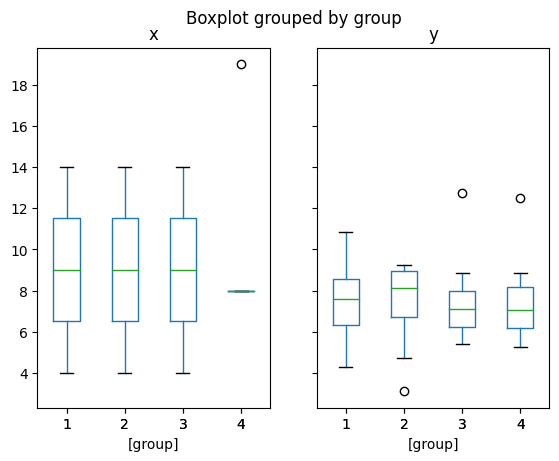

In [22]:
import matplotlib.pyplot as plt
# Visualize box plot so that we can see the distribution of each variable x and y for each group
anscombe.boxplot(by ='group', grid=False)
plt.show()
# we can also see there are some outliers

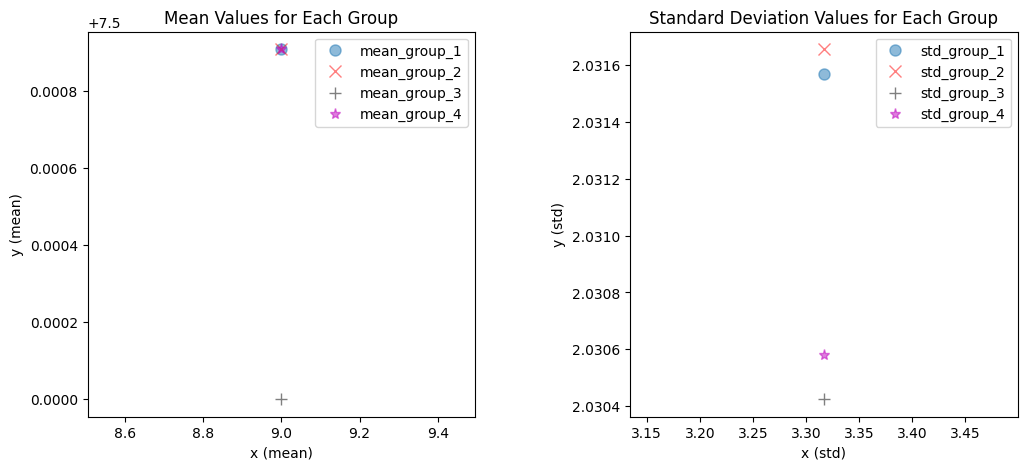

In [23]:
import matplotlib.pyplot as plt

# Create the figure and axes for two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot mean values for each group with adjusted marker shape and transparency
ax1.plot(desc_stat['x']['mean'].values[0], desc_stat['y']['mean'].values[0], 'o', markersize=8, label='mean_group_1', alpha=0.5)
ax1.plot(desc_stat['x']['mean'].values[1], desc_stat['y']['mean'].values[1], 'rx', markersize=8, label='mean_group_2', alpha=0.5)
ax1.plot(desc_stat['x']['mean'].values[2], desc_stat['y']['mean'].values[2], 'k+', markersize=8, label='mean_group_3', alpha=0.5)
ax1.plot(desc_stat['x']['mean'].values[3], desc_stat['y']['mean'].values[3], 'm*', markersize=8, label='mean_group_4', alpha=0.5)
ax1.set_xlabel('x (mean)')
ax1.set_ylabel('y (mean)')
ax1.set_title('Mean Values for Each Group')
ax1.legend()

# Plot variance values for each group with adjusted marker shape and transparency
ax2.plot(desc_stat['x']['std'].values[0], desc_stat['y']['std'].values[0], 'o', markersize=8, label='std_group_1', alpha=0.5)
ax2.plot(desc_stat['x']['std'].values[1], desc_stat['y']['std'].values[1], 'rx', markersize=8, label='std_group_2', alpha=0.5)
ax2.plot(desc_stat['x']['std'].values[2], desc_stat['y']['std'].values[2], 'k+', markersize=8, label='std_group_3', alpha=0.5)
ax2.plot(desc_stat['x']['std'].values[3], desc_stat['y']['std'].values[3], 'm*', markersize=8, label='std_group_4', alpha=0.5)
ax2.set_xlabel('x (std)')
ax2.set_ylabel('y (std)')
ax2.set_title('Standard Deviation Values for Each Group')
ax2.legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

In [24]:
# Visualize correlation to see if these four groups' x and y variables are correlated each other
corr_matrix = anscombe.groupby('group').corr()

In [25]:
corr_matrix

x         y
group                      
1     x  1.000000  0.816421
      y  0.816421  1.000000
2     x  1.000000  0.816237
      y  0.816237  1.000000
3     x  1.000000  0.816287
      y  0.816287  1.000000
4     x  1.000000  0.816521
      y  0.816521  1.000000

In [26]:
print(f"1st Group: rxy={corr_matrix['x'].values[1]}\n2nd Group: rxy={corr_matrix['x'].values[3]}\n3rd Group: rxy={corr_matrix['x'].values[5]}\n4th Group: rxy={corr_matrix['x'].values[7]}")

1st Group: rxy=0.8164205163448399
2nd Group: rxy=0.8162365060002427
3rd Group: rxy=0.8162867394895984
4th Group: rxy=0.8165214368885028


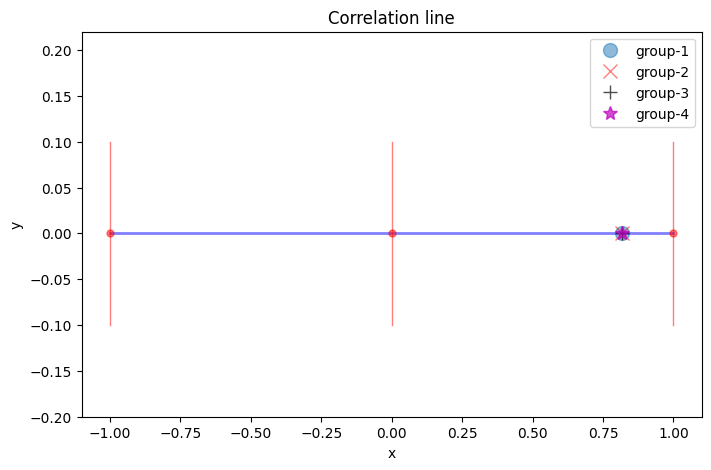

In [27]:
# Correlation line:
# Define x and y values for the straight line
x = [-1, 1]
y = [0, 0]

plt.figure(figsize=(8, 5))
# Plot the straight line with transparency
plt.plot(x, y, color='blue', linewidth=2, alpha=0.5)

# Highlight -1, 0, and 1 with short vertical lines
highlight_points = [-1, 0, 1]
plt.plot(highlight_points, [0, 0, 0], 'ro', markersize=5, alpha=0.5)  # Plot red circles at the points

# Add vertical lines with transparency
for point in highlight_points:
    plt.plot([point, point], [-0.1, 0.1], 'r-', linewidth=1, alpha=0.5)  # Plot red vertical lines

# Set the x and y axis limits
plt.xlim(-1.10, 1.10)
plt.ylim(-0.2, 0.22)

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Correlation line')

# Add correlation values between x and y variables for each group with transparency
plt.plot(corr_matrix['x'].values[1], 0, 'o', markersize=10, label='group-1', alpha=0.5)
plt.plot(corr_matrix['x'].values[3], 0, 'rx', markersize=10, label='group-2', alpha=0.5)
plt.plot(corr_matrix['x'].values[5], 0, 'k+', markersize=10, label='group-3', alpha=0.7)
plt.plot(corr_matrix['x'].values[7], 0, 'm*', markersize=10, label='group-4', alpha=0.7)

plt.legend()
# Show the plot
plt.show()

In [28]:
# Covariance values
cov_matrix = anscombe.groupby('group').cov()

In [29]:
cov_matrix

x         y
group                    
1     x  11.000  5.501000
      y   5.501  4.127269
2     x  11.000  5.500000
      y   5.500  4.127629
3     x  11.000  5.497000
      y   5.497  4.122620
4     x  11.000  5.499000
      y   5.499  4.123249

In [30]:
# Visualize the datasets for each group
grouped = anscombe.groupby('group')

# Display each group's data
for group, data in grouped:
    print(f"Group {group}:")
    print(data)
    print()

Group 1:
       x      y  group
0   10.0   8.04      1
1    8.0   6.95      1
2   13.0   7.58      1
3    9.0   8.81      1
4   11.0   8.33      1
5   14.0   9.96      1
6    6.0   7.24      1
7    4.0   4.26      1
8   12.0  10.84      1
9    7.0   4.82      1
10   5.0   5.68      1

Group 2:
       x     y  group
11  10.0  9.14      2
12   8.0  8.14      2
13  13.0  8.74      2
14   9.0  8.77      2
15  11.0  9.26      2
16  14.0  8.10      2
17   6.0  6.13      2
18   4.0  3.10      2
19  12.0  9.13      2
20   7.0  7.26      2
21   5.0  4.74      2

Group 3:
       x      y  group
22  10.0   7.46      3
23   8.0   6.77      3
24  13.0  12.74      3
25   9.0   7.11      3
26  11.0   7.81      3
27  14.0   8.84      3
28   6.0   6.08      3
29   4.0   5.39      3
30  12.0   8.15      3
31   7.0   6.42      3
32   5.0   5.73      3

Group 4:
       x      y  group
33   8.0   6.58      4
34   8.0   5.76      4
35   8.0   7.71      4
36   8.0   8.84      4
37   8.0   8.47      4
38   8.

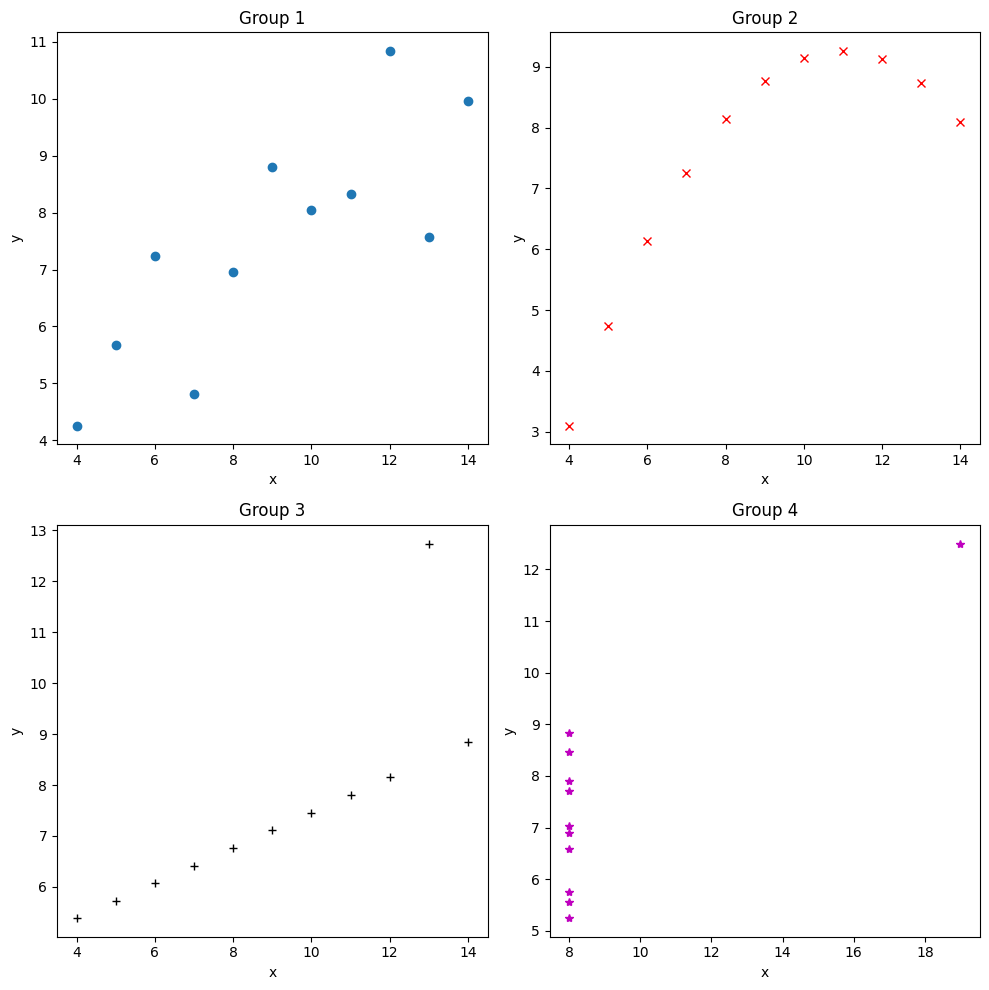

In [31]:
# Retrieve the values in each group
group_1 = grouped.get_group(1)
group_2 = grouped.get_group(2)
group_3 = grouped.get_group(3)
group_4 = grouped.get_group(4)

# Create the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot each group in a subplot
axes[0, 0].plot(grouped.get_group(1)['x'].values, grouped.get_group(1)['y'].values, 'o')
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title('Group 1')

axes[0, 1].plot(grouped.get_group(2)['x'].values, grouped.get_group(2)['y'].values, 'rx')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].set_title('Group 2')

axes[1, 0].plot(grouped.get_group(3)['x'].values, grouped.get_group(3)['y'].values, 'k+')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].set_title('Group 3')

axes[1, 1].plot(grouped.get_group(4)['x'].values, grouped.get_group(4)['y'].values, 'm*')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].set_title('Group 4')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Despite the dissimilarity of the scatter plots, our analysis of descriptive statistics, including mean values, standard deviations, covariance, and correlation, did not reveal clear distinctions. This raises the question of whether statistics can sometimes be misleading. However, it is important to emphasize that visualizing the data first is crucial in order to gain a deeper understanding of its descriptive characteristics before relying solely on statistical values.

Abdullah Azzam Olcay